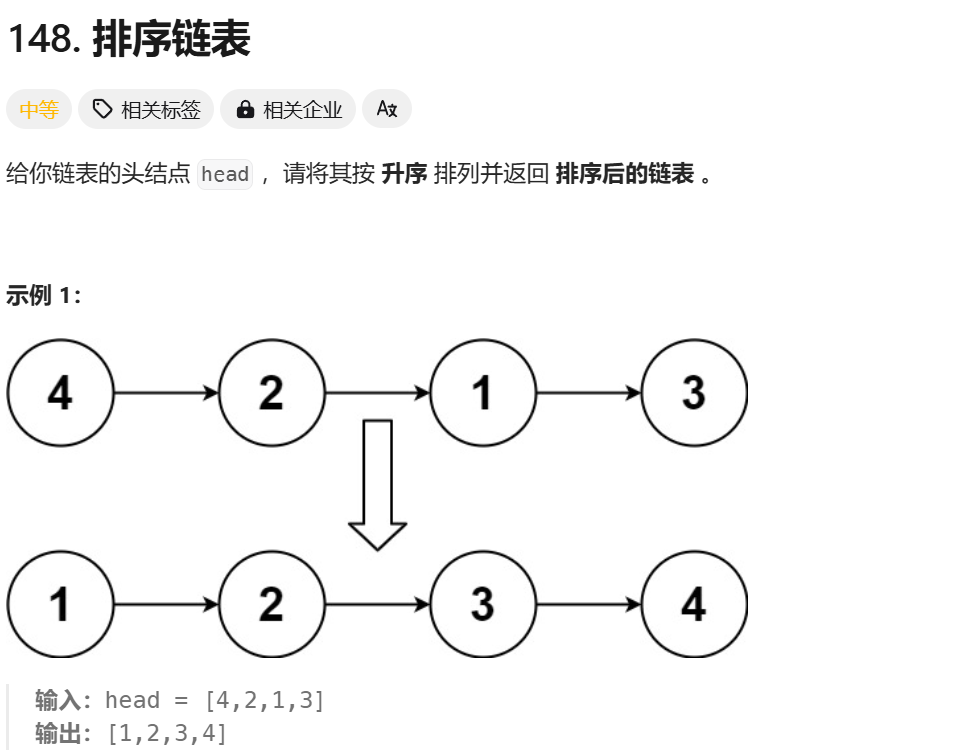

## 冒泡排序太慢
## 归并排序其实本质上是保证每次合并都是两个有序链表合并，那么合并结果也一定是有序的


In [1]:
# Definition for singly-linked list.
class LinkedNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def merge(self, lefthead: LinkedNode, righthead: LinkedNode)-> LinkedNode:
        dummy_head = LinkedNode(0)
        cur = dummy_head
        while lefthead and righthead:
            if lefthead.val < righthead.val:
                cur.next = lefthead
                lefthead = lefthead.next
            else:
                cur.next = righthead
                righthead = righthead.next
            cur = cur.next
        # 然后将剩下来的直接接到cur后面就好了
        if lefthead:
            cur.next = lefthead
        elif righthead:
            cur.next = righthead

        return  dummy_head.next

    def sortList(self, head = LinkedNode)-> LinkedNode:
        if not head or not head.next:  # 终止条件为一个，一个节点肯定是有序的，那么就能合并
            return head
        
        slow, fast = head, head.next # 一开始fast比slow快一个
        # 找中间
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
        righthead = slow.next
        lefthead = head
        slow.next = None  # 断开

        return self.merge(self.sortList(lefthead), self.sortList(righthead))
    
array = [5, 3, 4, 2, 5, 7, 1]
head = LinkedNode(array[0])
cur = head
for i in range(1, len(array)):
    node = LinkedNode(array[i])
    cur.next = node
    cur = cur.next

test = Solution()
head = test.sortList(head)
cur = head
while cur:
    print(cur.val, end="->")
    cur = cur.next

print("None")

1->2->3->4->5->5->7->None
